In [1]:
%pylab inline
import os
import scanpy as sc
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import harmonypy as hm

from matplotlib import *
import matplotlib.pyplot as plt
rcParams['pdf.fonttype']=42 # in order to save fonttype in AI
rcParams['ps.fonttype']=42

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
ad = sc.read('../10X/data_h5/Ext_20231019.h5ad')

In [3]:
ad

AnnData object with n_obs × n_vars = 21733 × 19944
    obs: 'batch', 'doublet_score', 'predicted_doublets', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'cluster_labels', 'sampleLayers'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'cluster_labels_colors', 'cluster_names', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sampleLayers_colors', 'tsne', 'umap'
    obsm: 'X_harmonypca', 'X_pca', 'X_tsne', 'X_umap', 'X_umapharmony', 'X_umapraw'
    varm: 'PCs'
    layers: 'RawCounts'
    obsp: 'connectivities', 'distances'

/home/liu/anaconda3/envs/bioSoft/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/liu/anaconda3/envs/bioSoft/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


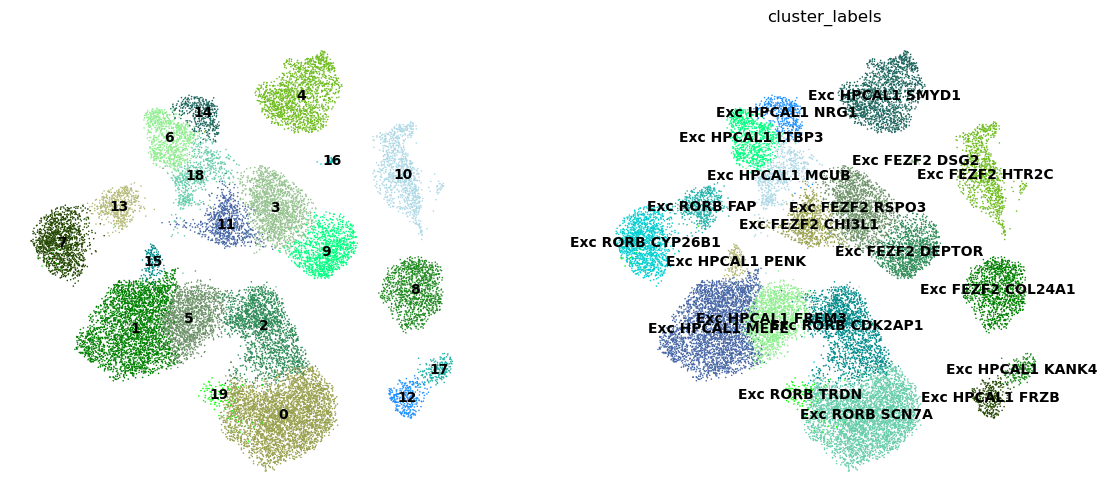

In [4]:
figsize(6,6)
sc.pl.umap(ad, color=['leiden','cluster_labels'], legend_loc='on data', title='', frameon=False,use_raw=True,size=5)

In [5]:
projectionCellType = ad.obs['leiden'].astype(str)
projectionCellType[projectionCellType.isin(['1','5','15'])] = 'L2/3 IT HPCAL1'
projectionCellType[projectionCellType.isin(['0','2','7','13','19'])] = 'IT RORB'
projectionCellType[projectionCellType.isin(['3','6','9','11','14','18'])] = 'L5 IT FEZF2'
projectionCellType[projectionCellType.isin(['16'])] = 'L5 ET'
projectionCellType[projectionCellType.isin(['8'])] = 'L5/6 CT'
projectionCellType[projectionCellType.isin(['4'])] = 'L6 IT'
projectionCellType[projectionCellType.isin(['12','17'])] = 'L6b'
projectionCellType[projectionCellType.isin(['10'])] = 'NP'
ad.obs['projectionCellType']  = projectionCellType.astype('category')

/home/liu/anaconda3/envs/bioSoft/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


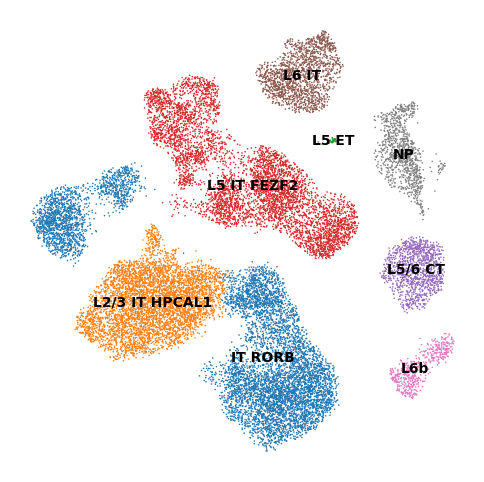

In [6]:
figsize(6,6)
sc.pl.umap(ad, color=['projectionCellType'], legend_loc='on data', title='', frameon=False,use_raw=True,size=5)

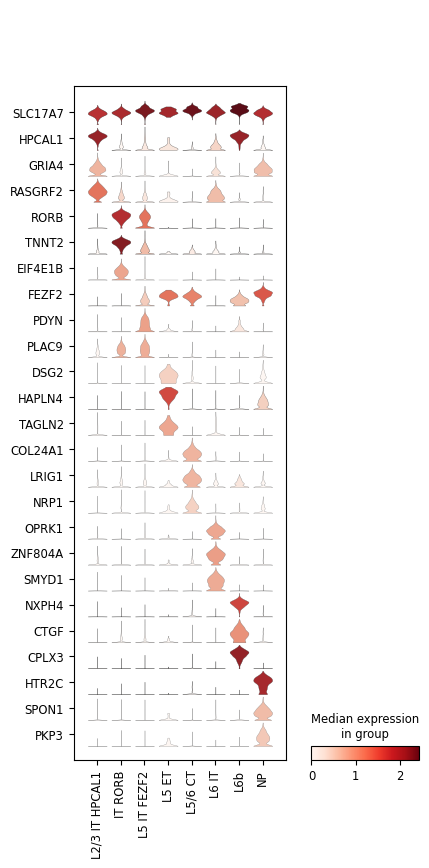

In [7]:
cellTypeMakers = ['SLC17A7','HPCAL1','GRIA4','RASGRF2','RORB','TNNT2','EIF4E1B','FEZF2','PDYN','PLAC9','DSG2','HAPLN4','TAGLN2',
                  'COL24A1','LRIG1','NRP1','OPRK1','ZNF804A','SMYD1','NXPH4','CTGF','CPLX3','HTR2C','SPON1','PKP3']
categories_order = ['L2/3 IT HPCAL1','IT RORB', 'L5 IT FEZF2','L5 ET','L5/6 CT', 'L6 IT','L6b','NP']
figsize(6,6)
sc.pl.stacked_violin(ad, cellTypeMakers, groupby='projectionCellType',swap_axes = True, categories_order=categories_order,cmap='Reds')#,save='ProjectionCellTypeMakers.pdf')

In [8]:
markerGenes = ['SLC17A7','THEMIS','HPCAL1','RORB','FEZF2',
               'MEPE','PENK','FREM3','LTBP3','MCUB','SMYD1', 'NRG1',                 #   HPCAL1
               'SCN7A', 'CDK2AP1','CYP26B1','FAP','TRDN',                            #   RORB
               'COL24A1','HTR2C','CHI3L1','DSG2','KANK4','DEPTOR','FRZB','RSPO3',]   #   FEZF2
categories_order = ['1','15','5','6','18','4','14',
                    '0','2','7','13','19',
                    '8','10','11','16','17','9','12','3',]

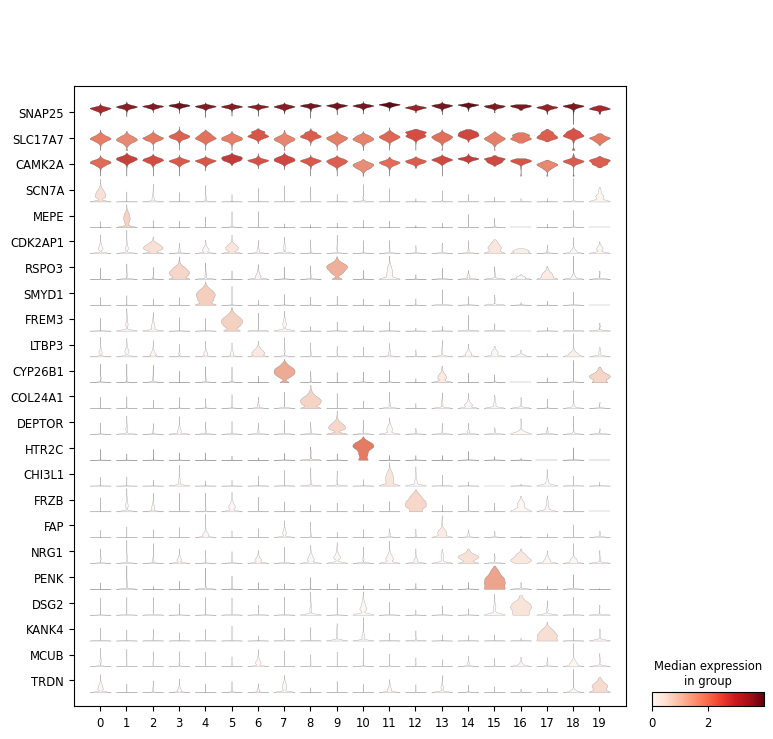

In [9]:
markerGenes = ['SNAP25','SLC17A7','CAMK2A','SCN7A','MEPE','CDK2AP1','RSPO3','SMYD1','FREM3','LTBP3','CYP26B1', 'COL24A1','DEPTOR','HTR2C','CHI3L1','FRZB','FAP','NRG1','PENK','DSG2','KANK4','MCUB','TRDN']
categories_order = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19']
figsize(8,10)
sc.pl.stacked_violin(ad, markerGenes, groupby='leiden',categories_order=categories_order,cmap='Reds', swap_axes = True,save='Ext_stackedVlnPlot.pdf')

In [10]:
cluster_to_labels = dict={
    '0':'Exc RORB SCN7A',                 #
    '1':'Exc HPCAL1 MEPE',                 #
    '2':'Exc RORB CDK2AP1',                 #
    '3':'Exc FEZF2 RSPO3',          #  IPCEF1  
    '4':'Exc HPCAL1 SMYD1',           # OPRK1
    '5':'Exc HPCAL1 FREM3',       #
    '6':'Exc HPCAL1 LTBP3',         # GPR83, ENSMFAG00000009570
    '7':'Exc RORB CYP26B1',
    '8':'Exc FEZF2 COL24A1',
    '9':'Exc FEZF2 DEPTOR',
    '10':'Exc FEZF2 HTR2C',
    '11':'Exc FEZF2 CHI3L1',   # TACR3
    '12':'Exc FEZF2 FRZB',    # ENSMFAG00000037829,   NXPH4
    '13':'Exc RORB FAP',
    '14':'Exc HPCAL1 NRG1',
    '15':'Exc HPCAL1 PENK',
    '16':'Exc FEZF2 DSG2',             # TRPC4
    '17':'Exc HPCAL1 KANK4',             #
    '18':'Exc HPCAL1 MCUB',             #
    '19':'Exc RORB TRDN ',             #
}
ad.obs['cluster_labels']=ad.obs['leiden'].map(cluster_to_labels).astype('category')

/home/liu/anaconda3/envs/bioSoft/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


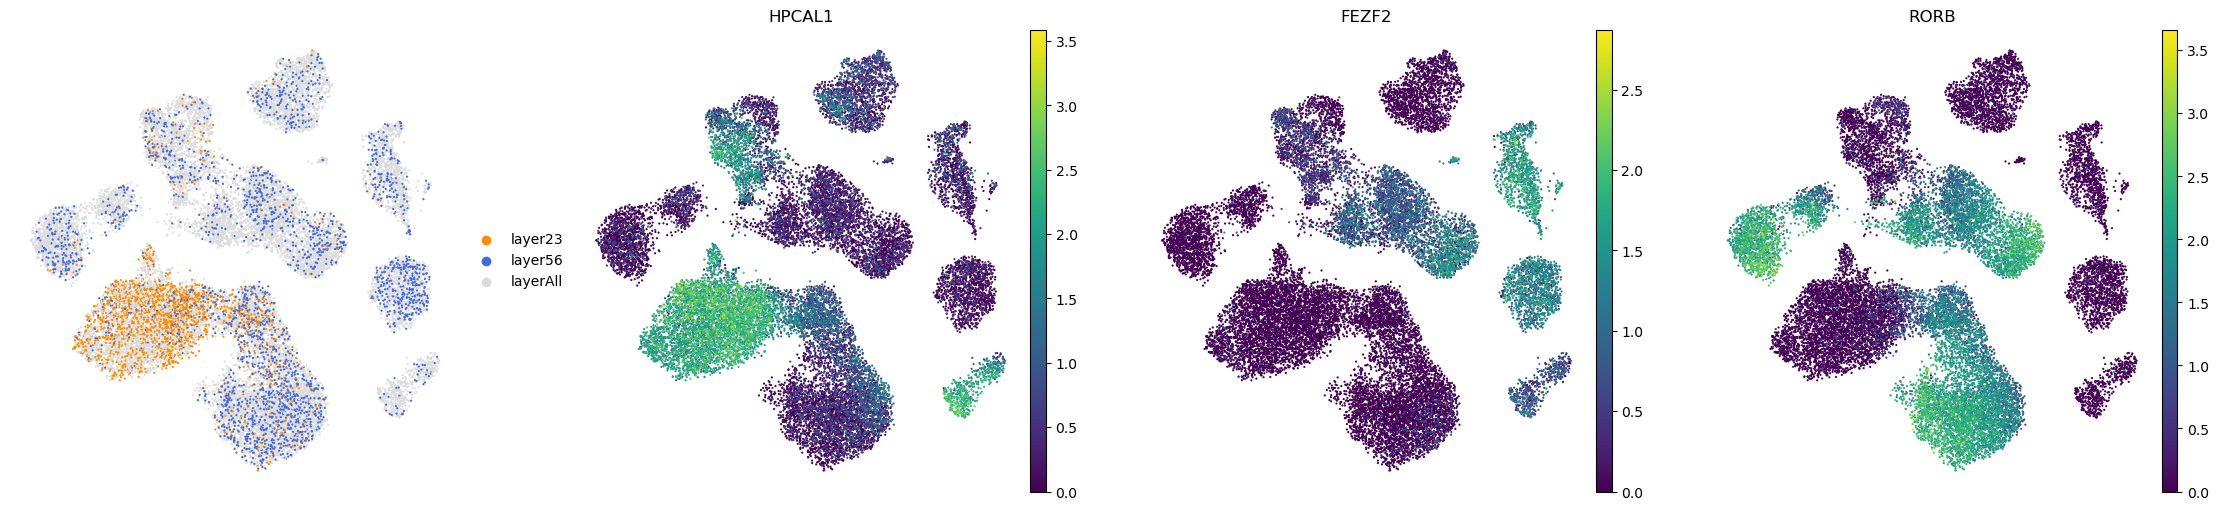

In [11]:
figsize(6,6)
sc.pl.umap(ad, color=['sampleLayers','HPCAL1','FEZF2','RORB'], legend_loc='right margin', title='', frameon=False,use_raw=True,size=10, save='Ext_layersDef_umap.pdf')